<a href="https://colab.research.google.com/github/Bob-Gohardani/Machine-Learning/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees.

A decision tree is often a generalization of the experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively (or empirically) derived rules that could be represented as a decision tree.

<img src="https://habrastorage.org/webt/p4/lm/sh/p4lmshrp9wh_2locm5sei23h7qc.png"><br>

<img align='center' src='https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png'><br>

In [ ]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

#### Example
Let's consider fitting a decision tree to some synthetic data. We will generate samples from two classes, both normal distributions but with different means.

In [ ]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Let's plot the data. Informally, the classification problem in this case is to build some "good" boundary separating the two classes (the red dots from the yellow). Machine learning for this case boils down to choosing a good separating border.

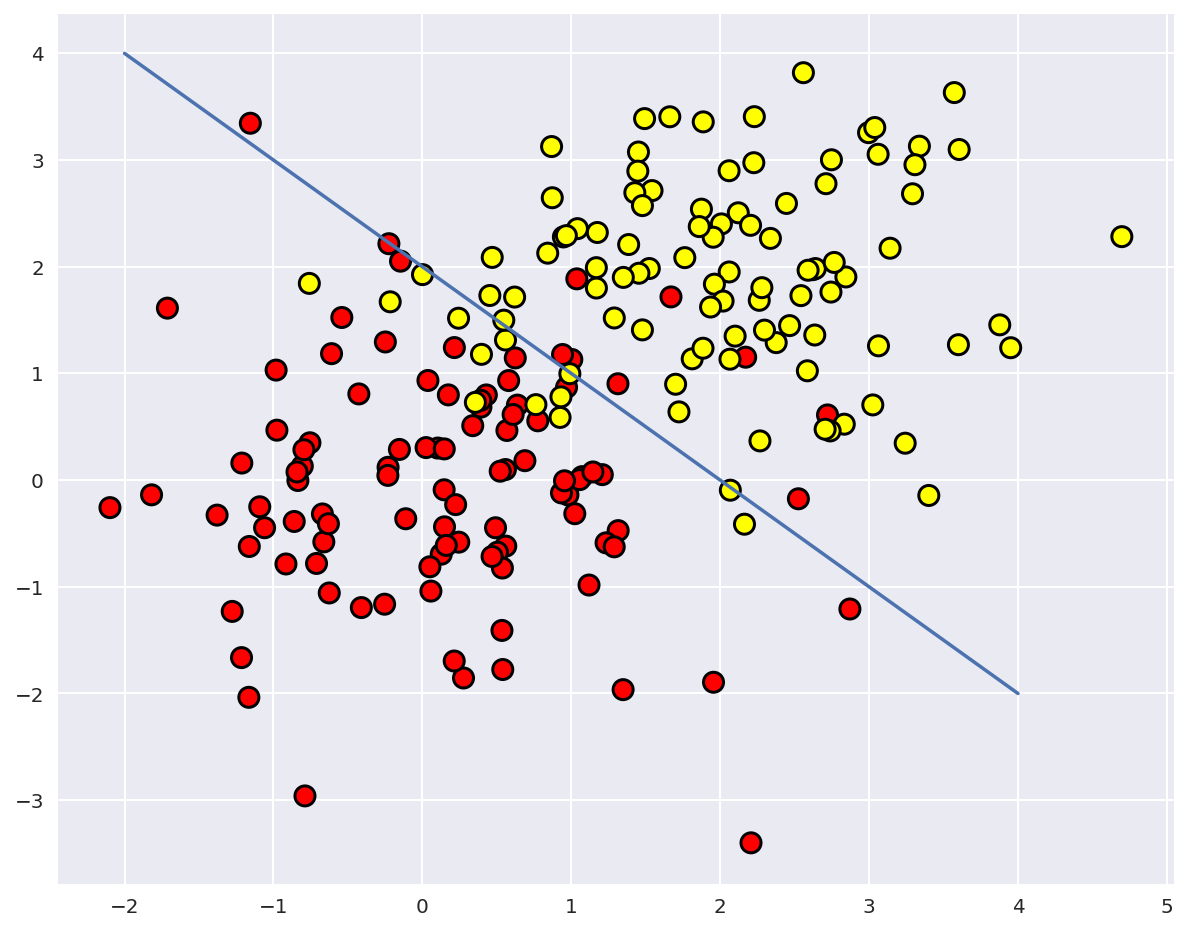

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Let's try to separate these two classes by training an `Sklearn` decision tree. We will use `max_depth` parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

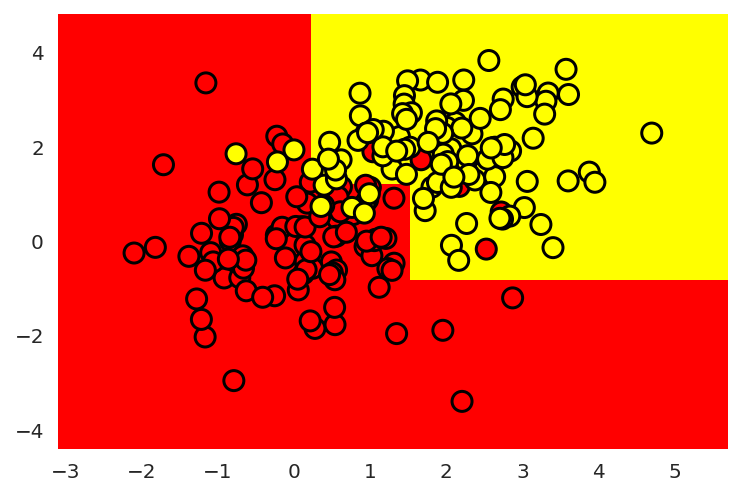

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# actual machine learning code
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# visualization
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

<img src="https://habrastorage.org/webt/z0/yp/wm/z0ypwmvjko4r2mymcohy7ovevwe.png" />

### How a Decision Tree Works with Numerical Features

Suppose we have a numeric feature "Age" that has a lot of unique values. A decision tree will look for the best (according to some criterion of information gain) split by checking binary attributes such as "Age <17", "Age < 22.87", and so on. But what if the age range is large? Or what if another quantitative variable, "salary", can also be "cut" in many ways? There will be too many binary attributes to select from at each step during tree construction. To resolve this problem, heuristics are usually used to limit the number of thresholds to which we compare the quantitative variable.
 
Let's consider an example. Suppose we have the following dataset:

In [ ]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Let's sort it by age in ascending order.

In [ ]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

<img src="https://habrastorage.org/webt/8a/yv/yl/8ayvylg20qkjpt3efhucezablto.png" width=40% />

We see that the tree used the following 5 values to evaluate by age: 43.5, 19, 22.5, 30, and 32 years. If you look closely, these are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1. To illustrate further, 43.5 is the average of 38 and 49 years; a 38-year-old customer failed to return the loan whereas the 49-year-old did. The tree looks for the values at which the target class switches its value as a threshold for "cutting" a quantitative variable.
 
Given this information, why do you think it makes no sense here to consider a feature like "Age <17.5"?

Let's consider a more complex example by adding the "Salary" variable (in the thousands of dollars per year).

In [ ]:
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
                      'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0



If we sort by age, the target class ( "loan default") switches (from 1 to 0 or vice versa) 5 times. And if we sort by salary, it switches 7 times. How will the tree choose features now? Let's see.


In [ ]:
data2.sort_values('Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

<img src="https://habrastorage.org/webt/sz/xq/sn/szxqsndrwbeggreswz63mnot2wg.png" width=30% />

We see that the tree partitioned by both salary and age. Moreover, the thresholds for feature comparisons are 43.5 and 22.5 years of age and 95k and 30.5k per year. Again, we see that 95 is the average between 88 and 102; the individual with a salary of 88k proved to be "bad" while the one with 102k was "good". The same goes for 30.5k. That is, only a few values for comparisons by age and salary were searched. Why did the tree choose these features? Because they gave better partitioning (according to Gini uncertainty). 

**Conclusion**: the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.

### Crucial Tree Parameters

Technically, you can build a decision tree until each leaf has exactly one instance, but this is not common in practice when building a single tree because it will be *overfitted*, or too tuned to the training set, and will not predict labels for new data well. At the bottom of the tree, at some great depth, there will be partitions on less important features (e.g. whether a client came from Leeds or New York). We can exaggerate this story further and find that all four clients who came to the bank for a loan in green trousers did not return the loan. Even if that were true in training, we do not want our classification model to generate such specific rules.
 
There are two exceptions where the trees are built to the maximum depth:
- Random Forest (a group of trees) averages the responses from individual trees that are built to the maximum depth (we will talk later on why you should do this)
- *Pruning* trees. In this approach, the tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using *cross-validation*, more on this below).

The picture below is an example of a dividing border built in an overfitted tree. 


<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

The most common ways to deal with overfitting in decision trees are as follows:
- artificial limitation of the depth or a minimum number of samples in the leaves: the construction of a tree just stops at some point;
- pruning the tree.

### Class DecisionTreeClassifier in Scikit-learn
The main parameters of the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class are:

- `max_depth` – the maximum depth of the tree;
- `max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for *all* features);
- `min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of *cross-validation*, more on this below.